In [43]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import q2_script

In [44]:
x_train, y_train, x_test, y_test = q2_script.read_dataset()
x_train, y_train, x_test, y_test = x_train / 255, y_train, x_test / 255, y_test
# Note: for some reason, when I use the function get_dataset() from q2_script, the images are not normalized
# but when I use read_dataset() at q2_script, the images are normalized. I don't know why. 

x_val = x_train[0:10000]
y_val = y_train[0:10000]

x_train = x_train[10000:]
y_train = y_train[10000:]

In [45]:
# print maxes
print("x_train max: ", np.max(x_train))
print("y_train max: ", np.max(y_train))
print("x_val max: ", np.max(x_val))
print("y_val max: ", np.max(y_val))
print("x_test max: ", np.max(x_test))
print("y_test max: ", np.max(y_test))

x_train max:  1.0
y_train max:  1.0
x_val max:  1.0
y_val max:  1.0
x_test max:  1.0
y_test max:  1.0


In [46]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (50000, 784)
y_train shape: (50000, 10)
x_val shape: (10000, 784)
y_val shape: (10000, 10)
x_test shape: (10000, 784)
y_test shape: (10000, 10)


In [47]:
# logistic regression model

class LogisticRegression:
    def __init__(self, x_train, y_train, x_val, y_val, x_test, y_test, weight_initilisation):
        self.x_train = x_train
        self.y_train = y_train
        self.x_val = x_val
        self.y_val = y_val
        self.x_test = x_test
        self.y_test = y_test
        self.weights = self.initialize_weights(weight_initilisation)
    
    def initialize_weights(self, weight_initilisation):
        np.random.seed(42)
        if weight_initilisation == "normal" or weight_initilisation == "gaussian":
            # normal distribution with mean 0 and variance 1
            self.weights = np.random.normal(loc=0.0, scale=1.0, size=(10, 784))
        elif weight_initilisation == "zeros":
            self.weights = np.zeros((10, 784))
        elif weight_initilisation == "uniform":
            self.weights = np.random.uniform(low=-1, high=1, size=(10, 784))
        else:
            raise Exception("Invalid weight initilisation method, choose from: \"normal\", \"zeros\" or \"uniform\"")
        return self.weights
    
    def softmax(self, z):
        # z is a vector of shape (10, 1)
        # change the nan values to 0
        nom = np.exp(z)
        denom = np.sum(np.exp(z), axis=0)
        nom[nom > 1e6] = 1e6
        nom[nom < 1e-6] = 1e-6
        denom[denom > 1e6] = 1e6
        denom[denom < 1e-6] = 1e-6
        return nom / denom
    
    def forward(self, x):
        # x is a vector of shape (784, 1)
        # weights is a matrix of shape (10, 784)
        # z is a vector of shape (10, 1)
        z = np.matmul(x, self.weights.T)
        return self.softmax(z)
    
    def train(self, epochs, lr, batch_size, L2_regularisation_coeff):
        # epochs: number of iterations
        # lr: learning rate
        # batch_size: size of mini-batch
        # L2_regularisation_coeff: lambda
        for epoch in range(epochs):
            print(f"Epoch {epoch + 1} of {epochs}")
            for i in range(0, len(self.x_train), batch_size):
                x_batch = self.x_train[i:i + batch_size]
                y_batch = self.y_train[i:i + batch_size]
                self.update_weights(x_batch, y_batch, lr, L2_regularisation_coeff)
            self.evaluate()
    
       
    def update_weights(self, x_batch, y_batch, lr, L2_regularisation_coeff):
        # x_batch is a matrix of shape (batch_size, 784)
        # y_batch is a matrix of shape (batch_size, 10)
        # weights is a matrix of shape (10, 784)
        # y_pred is a matrix of shape (batch_size, 10)
        # y_batch is a matrix of shape (batch_size, 10)
        # x_batch.T is a matrix of shape (784, batch_size)
        # grad is a matrix of shape (10, 784)
        # L2_regularisation_coeff is a scalar
        y_pred = self.forward(x_batch)
        # grad = np.matmul((y_pred - y_batch).T, x_batch) / len(x_batch) + L2_regularisation_coeff * self.weights
        grad = np.matmul((y_pred - y_batch).T, x_batch) + L2_regularisation_coeff * self.weights
        self.weights -= lr * grad
    
    def evaluate(self):
        # x_val is a matrix of shape (10000, 784)
        # y_val is a matrix of shape (10000, 10)
        # weights is a matrix of shape (10, 784)
        # y_pred is a matrix of shape (10000, 10)
        # y_val is a matrix of shape (10000, 10)
        # correct is a scalar
        y_pred = self.forward(self.x_val)
        # number of correct predictions
        correct = np.sum(np.argmax(y_pred, axis=1) == np.argmax(self.y_val, axis=1))
        print(f"Validation accuracy: {correct / len(self.x_val)}")
    
    def test(self):
        # x_test is a matrix of shape (10000, 784)
        # y_test is a matrix of shape (10000, 10)
        # weights is a matrix of shape (10, 784)
        # y_pred is a matrix of shape (10000, 10)
        # y_test is a matrix of shape (10000, 10)
        # correct is a scalar
        y_pred = self.forward(self.x_test)
        correct = np.sum(np.argmax(y_pred, axis=1) == np.argmax(self.y_test, axis=1))
        print(f"Test accuracy: {correct / len(self.x_test)}")

        

In [48]:
logistic_regression = LogisticRegression(x_train, y_train, x_val, y_val, x_test, y_test, "gaussian")
logistic_regression.train(epochs=100, lr=1e-2, batch_size=64, L2_regularisation_coeff=1e-2)

Epoch 1 of 100
Validation accuracy: 0.8692
Epoch 2 of 100
Validation accuracy: 0.8801
Epoch 3 of 100
Validation accuracy: 0.8837
Epoch 4 of 100
Validation accuracy: 0.8863
Epoch 5 of 100
Validation accuracy: 0.8878
Epoch 6 of 100
Validation accuracy: 0.8883
Epoch 7 of 100
Validation accuracy: 0.8887
Epoch 8 of 100
Validation accuracy: 0.8894
Epoch 9 of 100
Validation accuracy: 0.889
Epoch 10 of 100
Validation accuracy: 0.8886
Epoch 11 of 100
Validation accuracy: 0.8887
Epoch 12 of 100
Validation accuracy: 0.8887
Epoch 13 of 100
Validation accuracy: 0.889
Epoch 14 of 100
Validation accuracy: 0.8885
Epoch 15 of 100
Validation accuracy: 0.8884
Epoch 16 of 100
Validation accuracy: 0.8883
Epoch 17 of 100
Validation accuracy: 0.8884
Epoch 18 of 100
Validation accuracy: 0.8886
Epoch 19 of 100
Validation accuracy: 0.8883
Epoch 20 of 100
Validation accuracy: 0.8884
Epoch 21 of 100
Validation accuracy: 0.8884
Epoch 22 of 100
Validation accuracy: 0.8883
Epoch 23 of 100
Validation accuracy: 0.888


In [49]:
testAcc = logistic_regression.test()
print(testAcc)

Test accuracy: 0.8958
None


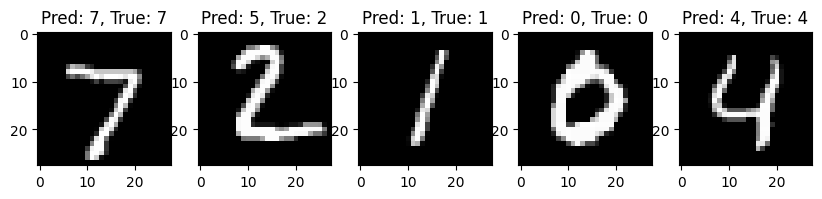

In [50]:
y_pred = logistic_regression.forward(x_test[:5])
pred = np.argmax(y_pred, axis=1)
label = np.argmax(y_test[:5], axis=1)
# display the first 5 images with their predicted and true labels side by side
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"Pred: {pred[i]}, True: {label[i]}")

plt.show()


In [51]:
x_test[i].shape

(784,)